In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
!pip install selenium
import selenium



In [31]:
# Basic library installation code
# Install necessary libraries
!pip install fasttext
!pip install scikit-learn
!pip install xgboost
!pip install transformers
!pip install matplotlib
!pip install seaborn
!pip install gensim
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113





   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 70.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [gensim]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
cudf-cu12 25.2.1 requires pyarrow<20.0.0a0,>=14.0.0; platform_machine == "x86_64", but you have pyarrow 20.0.0 which is incompatible.
thinc 

In [32]:
import fasttext
import torch
import re
import time
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xgboost as xgb
from gensim.models import FastText
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from transformers import ElectraTokenizer, ElectraForSequenceClassification
from sklearn.metrics import confusion_matrix, classification_report


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [22]:
# Step 3: Load the dataset
data = pd.read_csv('/content/spam_Emails_data.csv')

# Display the first 5 rows
print(data.head())


  label                                               text
0  Spam  viiiiiiagraaaa\nonly for the ones that want to...
1   Ham  got ice thought look az original message ice o...
2  Spam  yo ur wom an ne eds an escapenumber in ch ma n...
3  Spam  start increasing your odds of success & live s...
4   Ham  author jra date escapenumber escapenumber esca...


In [25]:
# Step 2 data preprocessing # Try specifying the delimiter explicitly (e.g., using a comma)
file_path = '/content/spam_Emails_data.csv'

# Try specifying the delimiter explicitly
data = pd.read_csv(file_path, sep=',', on_bad_lines='skip')  # or use on_bad_lines='warn'

# Total number of emails in the original dataset
total_emails = len(data)
print(f"Total number of emails in the dataset: {total_emails}")

# Drop rows with missing 'text'
data = data.dropna(subset=['text'])

# Preprocessing function
def preprocess_text(text):
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove special characters
    text = re.sub(r"\s+", " ", text)         # Replace multiple spaces with single space
    text = text.strip()                      # Remove leading/trailing spaces
    text = text.lower()                      # Convert to lowercase
    return text

# Apply preprocessing
data['cleaned_text'] = data['text'].astype(str).apply(preprocess_text)

# Remove empty cleaned texts
data = data[data['cleaned_text'].str.strip() != ""]

# Tokenize the text
data['tokenized_text'] = data['cleaned_text'].apply(lambda x: x.split())

# Number of emails after preprocessing
preprocessed_emails = len(data)
print(f"Number of emails after preprocessing: {preprocessed_emails}")

Total number of emails in the dataset: 193852
Number of emails after preprocessing: 193752


In [29]:
# Step 3  Train FastText Model
corpus = data['tokenized_text'].tolist()
print("Training FastText model...")
start_time = time.time()

fasttext_model = FastText(
    sentences=corpus,
    vector_size=20,  # Smaller dimension
    window=5,
    min_count=2,
    sg=0,  # CBOW
    workers=4,
    epochs=5,
     seed=42
)

end_time = time.time()
print(f"FastText training completed in {end_time - start_time:.2f} seconds.")

# Generate Embeddings
def get_email_embedding(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

#  Apply to entire dataset
data['embedding'] = data['tokenized_text'].progress_apply(lambda x: get_email_embedding(x, fasttext_model))

#  Convert to NumPy array
X = np.vstack(data['embedding'].values)

#  Checks
print(type(data['embedding']))               # <class 'pandas.core.series.Series'>
print(type(data['embedding'].iloc[0]))       # <class 'numpy.ndarray'>
print(data['embedding'].iloc[0].shape)       # (20,)

# Reduce Dimensions with PCA
print("Reducing dimensionality using PCA...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

#  Visualization
print("Generating plot...")
plt.figure(figsize=(10, 6))

# Define colors: Spam (red), Ham (blue)
colors = {'Spam': 'red', 'Ham': 'blue'}
data['color'] = data['label'].map(colors)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['color'], alpha=0.5, s=10)
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.title("Email Embeddings Visualized in 2D Space (PCA)")

# Legend
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markersize=8, markerfacecolor='red', label='Spam'),
    plt.Line2D([0], [0], marker='o', color='w', markersize=8, markerfacecolor='blue', label='Ham')
])

# Null check
print(data['embedding'].isnull().sum())  # Should be 0
print(data['embedding'].sample(1).tolist())  # Preview one embedding

plt.grid(True)
plt.show()

Training FastText model...


NameError: name 'FastText' is not defined

In [ ]:
# Step 4 XG Boost for feature selection
# Load Data (Ensure 'X' contains FastText embeddings & 'data["label"]' contains Spam/Ham labels)
y = data['label'].map({'Ham': 0, 'Spam': 1})

# Print Initial Data Info
print(f"Total Emails: {X.shape[0]}")
print(f"Initial Features: {X.shape[1]}")

# Train XGBoost Model for Feature Selection with random_state set
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
import numpy as np

xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42  # Ensures consistent feature selection
)
xgb_model.fit(X, y)

# Apply Feature Selection to the Entire Dataset
selector_xgb = SelectFromModel(xgb_model, prefit=True)
X_selected_xgb = selector_xgb.transform(X)

# Print Features After Selection
print(f"Features Selected by XGBoost: {X_selected_xgb.shape[1]} out of {X.shape[1]}")

# Split the Dataset After Feature Selection (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X_selected_xgb, y, test_size=0.2, random_state=42)

# Print Final Data Shapes
print(f"Training Data: {X_train.shape}, Testing Data: {X_test.shape}")

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Save Selected Features and Split Data for Future Use
np.save("/content/drive/My Drive/X_train.npy", X_train)
np.save("/content/drive/My Drive/X_test.npy", X_test)
np.save("/content/drive/My Drive/y_train.npy", y_train)
np.save("/content/drive/My Drive/y_test.npy", y_test)

# Success Message
print("Feature selection and train-test split complete. Data saved for ML/DL models.")


Total Emails: 193752
Initial Features: 20


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:57:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Features Selected by XGBoost: 5 out of 20
Training Data: (155001, 5), Testing Data: (38751, 5)
Mounted at /content/drive
Feature selection and train-test split complete. Data saved for ML/DL models.


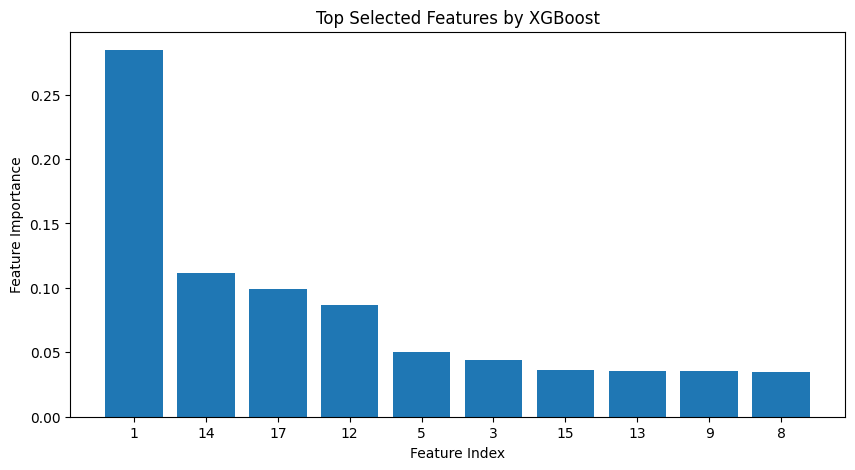

In [ ]:
# show xg boost result in plot

# Get feature importance scores
feature_importance = xgb_model.feature_importances_

# Sort features by importance
sorted_idx = np.argsort(feature_importance)[::-1]  # Highest to lowest

plt.figure(figsize=(10, 5))
plt.bar(range(len(sorted_idx[:10])), feature_importance[sorted_idx[:10]], align="center")
plt.xticks(range(len(sorted_idx[:10])), sorted_idx[:10])  # Display feature indices
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.title("Top Selected Features by XGBoost")
plt.show()

In [ ]:
from transformers import ElectraForSequenceClassification

model = ElectraForSequenceClassification.from_pretrained('google/electra-small-discriminator')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/54.2M [00:00<?, ?B/s]

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-small-discriminator and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading data...
Tokenizing data...


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Creating Dataset objects...
Initializing ELECTRA model...


Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-small-discriminator and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Training ELECTRA...


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.268200,0.261778,0.888751,0.898606,0.861969,0.879906
2,0.256400,0.245236,0.898377,0.891380,0.894007,0.892692
3,0.222700,0.237850,0.903099,0.892367,0.904104,0.898197


Evaluation Results: {'eval_loss': 0.23785048723220825, 'eval_accuracy': 0.903099274857423, 'eval_precision': 0.8923665355815331, 'eval_recall': 0.904104355419714, 'eval_f1': 0.8981970990917717, 'eval_runtime': 21.2947, 'eval_samples_per_second': 1819.749, 'eval_steps_per_second': 28.458, 'epoch': 3.0}


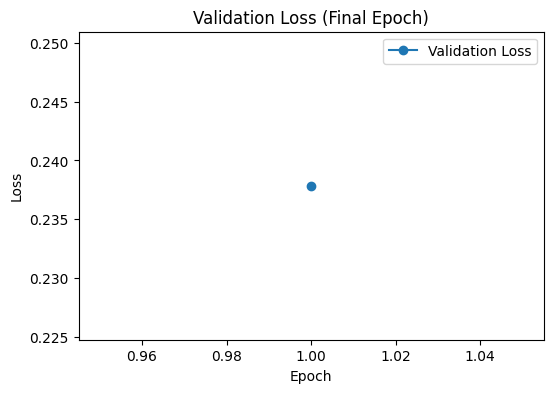

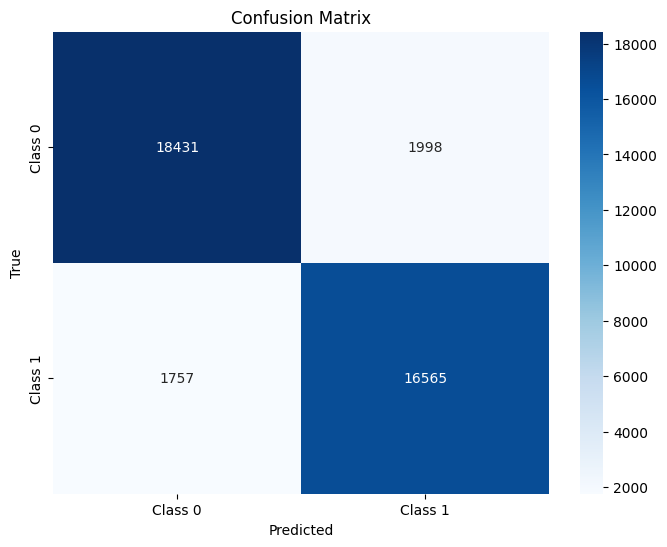

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91     20429
           1       0.89      0.90      0.90     18322

    accuracy                           0.90     38751
   macro avg       0.90      0.90      0.90     38751
weighted avg       0.90      0.90      0.90     38751



In [ ]:
from datasets import Dataset

# Train ELECTRA and Load .npy data
print("Loading data...")
X_train = np.load("/content/drive/My Drive/X_train.npy", allow_pickle=True)
X_test = np.load("/content/drive/My Drive/X_test.npy", allow_pickle=True)
y_train = np.load("/content/drive/My Drive/y_train.npy")
y_test = np.load("/content/drive/My Drive/y_test.npy")

# Tokenize using ELECTRA
print("Tokenizing data...")
tokenizer = ElectraTokenizer.from_pretrained('google/electra-small-discriminator')
X_train = [str(x) for x in X_train]
X_test = [str(x) for x in X_test]
train_encodings = tokenizer(X_train, truncation=True, padding=True, max_length=256)
test_encodings = tokenizer(X_test, truncation=True, padding=True, max_length=256)

# Create datasets
print("Creating Dataset objects...")
train_dataset = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'label': y_train.tolist()
})
test_dataset = Dataset.from_dict({
    'input_ids': test_encodings['input_ids'],
    'attention_mask': test_encodings['attention_mask'],
    'label': y_test.tolist()
})

# Load model
print("Initializing ELECTRA model...")
model = ElectraForSequenceClassification.from_pretrained(
    'google/electra-small-discriminator',
    num_labels=2
)

# Training arguments
training_args = TrainingArguments(
    output_dir='/content/drive/My Drive/electra_model',
    num_train_epochs=3,
    per_device_train_batch_size=32,  # ⬅️ Faster batch size
    per_device_eval_batch_size=64,
    warmup_steps=200,
    weight_decay=0.01,
    logging_dir='/content/drive/My Drive/electra_logs',
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    logging_steps=100,
    report_to="none"  # Remove if using wandb
)

# Metrics
def compute_metrics(p):
    predictions = p.predictions.argmax(axis=-1)
    return {
        'accuracy': accuracy_score(p.label_ids, predictions),
        'precision': precision_score(p.label_ids, predictions),
        'recall': recall_score(p.label_ids, predictions),
        'f1': f1_score(p.label_ids, predictions)
    }

# Trainer
print("Training ELECTRA...")
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# Train
train_results = trainer.train()

# Evaluate
eval_results = trainer.evaluate()
print(f"Evaluation Results: {eval_results}")

# Plot loss
plt.figure(figsize=(6, 4))
plt.plot([1], [eval_results['eval_loss']], marker='o', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss (Final Epoch)')
plt.legend()
plt.show()

# Confusion matrix
predictions = trainer.predict(test_dataset)
predicted_labels = predictions.predictions.argmax(axis=-1)
cm = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Report
print("Classification Report:")
print(classification_report(y_test, predicted_labels))

In [ ]:
model_name = "xlnet-base-cased"  # official name

# Download directly from Huggingface
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

save_directory = "/content/drive/My Drive/xlnet-base-cased"

# Save tokenizer + model
tokenizer.save_pretrained(save_directory)
model.save_pretrained(save_directory)



config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/467M [00:00<?, ?B/s]

Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/467M [00:00<?, ?B/s]

In [ ]:
# Train XLNET and  Load Data
print(" Loading data...")
X_train = np.load("/content/drive/My Drive/X_train.npy", allow_pickle=True)
X_test = np.load("/content/drive/My Drive/X_test.npy", allow_pickle=True)
y_train = np.load("/content/drive/My Drive/y_train.npy")
y_test = np.load("/content/drive/My Drive/y_test.npy")

X_train = [str(x) for x in X_train]
X_test = [str(x) for x in X_test]

# 2. Load Tokenizer
print("🔤 Tokenizing data...")
model_path = '/content/drive/MyDrive/xlnet-base-cased'
if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model path does not exist: {model_path}")

tokenizer = AutoTokenizer.from_pretrained(model_path, local_files_only=True)

def tokenize(batch):
    return tokenizer(batch['text'], truncation=True, padding='max_length', max_length=256)

# 3. Prepare Dataset
print(" Preparing datasets...")
train_data = Dataset.from_dict({"text": X_train, "label": y_train.tolist()})
test_data = Dataset.from_dict({"text": X_test, "label": y_test.tolist()})

train_data = train_data.map(tokenize, batched=True)
test_data = test_data.map(tokenize, batched=True)

train_data.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
test_data.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

# 4. Load Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(" Loading XLNet model...")
model = AutoModelForSequenceClassification.from_pretrained(
    model_path, num_labels=2, local_files_only=True
).to(device)

# 5. Optimizer + Scheduler Setup
from transformers import get_scheduler

optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)

# Total steps calculation
epochs = 3
batch_size = 32
total_steps = (len(train_data) // batch_size) * epochs

lr_scheduler = get_scheduler(
    name="linear",  # or "cosine", "polynomial"
    optimizer=optimizer,
    num_warmup_steps=200,
    num_training_steps=total_steps
)

# 6. Training Arguments
print(" Setting up training arguments...")
training_args = TrainingArguments(
    output_dir='/content/drive/MyDrive/xlnet_model',
    num_train_epochs=epochs,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=64,
    gradient_accumulation_steps=2,
    learning_rate=2e-5,
    warmup_steps=200,
    weight_decay=0.01,
    logging_dir='/content/drive/MyDrive/xlnet_logs',
    logging_steps=1,  # Har step pe log, but plotting 4 hi dafa hoga
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    report_to="none",
    fp16=True,
)

# 7. Metrics Function
def compute_metrics(eval_pred):
    preds = np.argmax(eval_pred.predictions, axis=1)
    labels = eval_pred.label_ids
    return {
        "accuracy": accuracy_score(labels, preds),
        "precision": precision_score(labels, preds, zero_division=0),
        "recall": recall_score(labels, preds, zero_division=0),
        "f1": f1_score(labels, preds, zero_division=0)
    }

# 8. Callback for Limited Live Loss Plot
from transformers import TrainerCallback

class LossPlotCallback(TrainerCallback):
    def __init__(self, total_steps):
        self.losses = []
        self.steps = []
        self.total_steps = total_steps

    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs is not None and "loss" in logs:
            self.losses.append(logs["loss"])
            self.steps.append(state.global_step)

            # Plot only at 4 specific points
            if state.global_step in [
                self.total_steps // 4,
                self.total_steps // 2,
                (3 * self.total_steps) // 4,
                self.total_steps
            ]:
                plt.figure(figsize=(8, 4))
                plt.plot(self.steps, self.losses, label="Training Loss")
                plt.xlabel("Steps")
                plt.ylabel("Loss")
                plt.title(f"Training Progress at step {state.global_step} 📉")
                plt.legend()
                plt.grid(True)
                plt.show()
                plt.close()

# 9. Initialize Trainer
print(" Initializing Trainer...")
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=test_data,
    compute_metrics=compute_metrics,
    optimizers=(optimizer, lr_scheduler),
    callbacks=[LossPlotCallback(total_steps)]  # Pass total_steps here
)

# 10. Train the model
print(" Starting training...")
trainer.train()

# 11. Evaluate
print("📈 Evaluating XLNet...")
predictions = trainer.predict(test_data)
y_pred = np.argmax(predictions.predictions, axis=1)
y_true = predictions.label_ids

# 12. Classification Report
print("\n Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=["Not Spam", "Spam"]))

# 13. Confusion Matrix
print(" Confusion Matrix:")
conf_mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Not Spam", "Spam"],
            yticklabels=["Not Spam", "Spam"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# 14. Prediction Distribution Pie Chart
print(" Prediction Distribution:")
labels = ['Not Spam', 'Spam']
counts = [np.sum(y_pred == 0), np.sum(y_pred == 1)]
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(5, 5))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Prediction Distribution')
plt.axis('equal')
plt.show()

# 15. Done
print("✅ XLNet Training & Evaluation Complete!")


 Loading data...
🔤 Tokenizing data...
 Preparing datasets...


Map:   0%|          | 0/155001 [00:00<?, ? examples/s]

Map:   0%|          | 0/38751 [00:00<?, ? examples/s]

 Loading XLNet model...
 Setting up training arguments...
 Initializing Trainer...
 Starting training...


Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss
